In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib
backup = matplotlib.rcParams
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

<h1>The Problem</h1>

In [4]:
%matplotlib notebook

In [5]:
##############
#### REQUIRED FOR ANIMATION
##############

df = pd.read_csv("atlas-higgs-challenge-2014-v2.csv")

def invert_eta(eta):
    # pseudorapidity η = −ln tan(θ/2);
    theta = 2* np.arctan( np.exp(-1*eta) )
    return theta

#numPts = 6
startPt = np.random.randint(0,10000)
numPts = startPt+1


def grab_event(df, start_row, event_type="s", particle_type="lep"):
    """
    start_row : int element of [0, df.shape[0]]
    event_type : str, {"s", "b"}
    particle_type : str, {
                        "lep", "tau", 
                        "met", "jet_leading",
                        "jet_subleading"
                        }
        lep = Lepton
        tau = Tau
        met = Missing Transverse Energy
    """
    
    _eta = "PRI_" + particle_type + "_eta"
    _phi = "PRI_" + particle_type + "_phi"
    _pt = "PRI_" + particle_type + "_pt"
    
    particle = df[df["Label"] == event_type]#[[_eta, _phi, _pt]]
    phi      = particle[_phi].values[start_row]
    theta    = invert_eta( particle[_eta].values[start_row] )
    trans_p  = particle[_pt].values[start_row]
    
    return theta, phi, trans_p 

def sph2cart(theta, phi, r):
    x = r * np.multiply( np.sin(phi), np.cos(theta) )
    y = r * np.multiply( np.sin(phi),np.sin(theta) )
    z = r * np.cos(phi)
    return (x, y, z)

def plot_wrapper(df, event_id,ax):

    thetaLep_b, phiLep_b, _ = grab_event(df, event_id, event_type="b", particle_type="lep")
    thetaTau_b, phiTau_b, _ = grab_event(df, event_id, event_type="b", particle_type="tau")
    thetaLep_s, phiLep_s, _ = grab_event(df, event_id, event_type="s", particle_type="lep")
    thetaTau_s, phiTau_s, _ = grab_event(df, event_id, event_type="s", particle_type="tau")
    
    collision_plot( (thetaLep_b, phiLep_b, thetaTau_b, phiTau_b),
                    (thetaLep_s, phiLep_s, thetaTau_s, phiTau_s),ax
                  )    


def collision_plot(background, signal,ax):
    """
    background --> ( thetaLep, phiLep, thetaTau, phiTau )
    signal     --> ( thetaLep, phiLep, thetaTau, phiTau )
    """
    thetaLep_b, phiLep_b, thetaTau_b, phiTau_b = background
    thetaLep_s, phiLep_s, thetaTau_s, phiTau_s   = signal
    
    #fig1 = plt.figure(figsize=(5,5))
    #ax = Axes3D(fig1)
    #ax = plt.axes(projection='3d')
    
    #ax.plot3D(xline, yline, zline, 'gray')
    
    
    xbLep, ybLep, zbLep = sph2cart(thetaLep_b, phiLep_b, 1)
    xsLep, ysLep, zsLep = sph2cart(thetaLep_s, phiLep_s, 1)
    xbTau, ybTau, zbTau = sph2cart(thetaTau_b, phiTau_b, 1)
    xsTau, ysTau, zsTau = sph2cart(thetaTau_s, phiTau_s, 1)

    
    # draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="black",alpha=0.1)

    #ax.scatter3D(xbLep, ybLep, zbLep,c="red")#, c=z, cmap='Greens');
    #ax.scatter3D(xsLep, ysLep, zsLep,c="green")#, c=z, cmap='Greens');
    #ax.scatter3D(xbTau, ybTau, zbTau,c="Blue")#, c=z, cmap='Greens');
    #ax.scatter3D(xsTau, ysTau, zsTau,c="orange")#, c=z, cmap='Greens');

    ax.scatter3D(xbLep, zbLep, ybLep,c="red")#, c=z, cmap='Greens');
    ax.scatter3D(xsLep, zsLep, ysLep,c="blue")#, c=z, cmap='Greens');
    ax.scatter3D(xbTau, zbTau, ybTau,c="red")#, c=z, cmap='Greens');
    ax.scatter3D(xsTau, zsTau, ysTau,c="blue")#, c=z, cmap='Greens');


    #ax.plot3D([0,xbLep], [0,ybLep], [0,zbLep],label="lep b",c="red")#, c=z, cmap='Greens');
    #ax.plot3D([0,xsLep], [0,ysLep], [0,zsLep],label="lep s",c="green")#, c=z, cmap='Greens');
    #ax.plot3D([0,xbTau], [0,ybTau], [0,zbTau],label="Tau b",c="Blue")#, c=z, cmap='Greens');
    #ax.plot3D([0,xsTau], [0,ysTau], [0,zsTau],label="Tau s",c="orange")#, c=z, cmap='Greens');

    ax.plot3D([0,xbLep], [0,zbLep], [0,ybLep],label="lep b",linestyle="--",c="red")#, c=z, cmap='Greens');
    ax.plot3D([0,xsLep], [0,zsLep], [0,ysLep],label="lep s",linestyle="--",c="blue")#, c=z, cmap='Greens');
    ax.plot3D([0,xbTau], [0,zbTau], [0,ybTau],label="Tau b",c="red")#, c=z, cmap='Greens');
    ax.plot3D([0,xsTau], [0,zsTau], [0,ysTau],label="Tau s",c="blue")#, c=z, cmap='Greens');
    ax.plot3D([0,0], [-2,2], [0,0],c="black",alpha=0.3)#, c=z, cmap='Greens');
    plt.ylim(-1,1)
    
    #ax.view_init(elev=25, azim=-15)
    plt.legend()
    plt.title("Lab Frame")
    #plt.show()



<IPython.core.display.Javascript object>


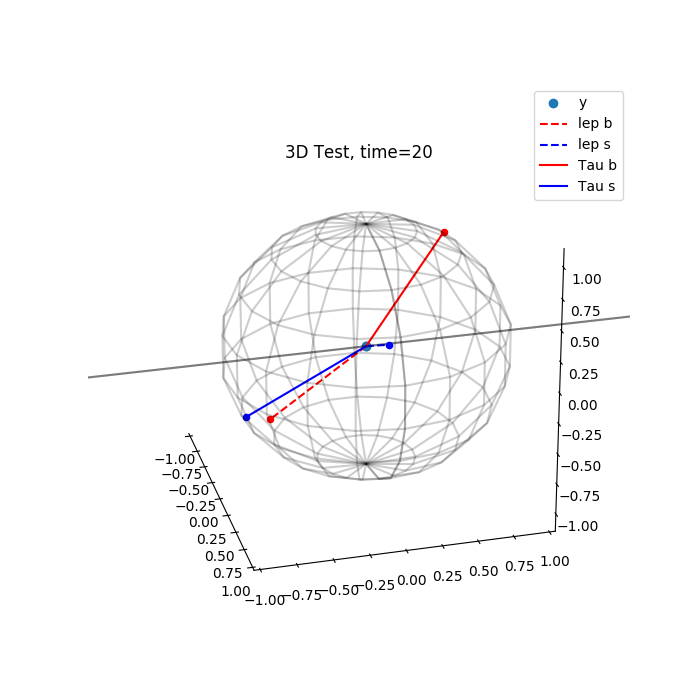

In [6]:
#######
### RUN ANIMATION
#######
b = np.array([list(np.arange(-1,0,0.05)), list(np.arange(1,0,-0.05))])
b.shape
b.flatten(order="F")
temp = np.array([list(np.arange(-1,0.05,0.05)), list(np.arange(1,-0.05,-0.05))]).flatten(order="F")
a = np.array([[0]*42, list(temp), [0]*42 ]).T
t = np.array([np.ones(2)*i for i in range(21)]).flatten()
tst = pd.DataFrame( {"time": t, "x" : a[:,0], "y":a[:,1], "z" : a[:,2]} )

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
xtot = 0
ztot=0
def update_graph(num):
    data=tst[tst['time']==num]
    global xtot
    xtot+=1
    if xtot>21:
        plot_wrapper(df, 101,ax)
    ztot=0
    graph.set_data (data.x, data.y)
    graph.set_3d_properties( np.array([ztot]) )
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 


# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="black",alpha=0.1)

data=tst[tst['time']==0]
graph, = ax.plot(data.x, data.y, data.z, linestyle="", marker="o")
ax.plot3D([0,0], [-2,2], [0,0],c="black",alpha=0.3)
ani = animation.FuncAnimation(fig, update_graph, 21, 
                               interval=20, blit=True,repeat=False)
ax.view_init(elev=25, azim=-15)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

What we achieved
====

* Understanding of the experimental particle detection setup
* The meaning of the measurements
* Data visualization
* Training extreme gradient boosting models
* Training ensemble models in 24 hours is hard!

<h1>The Physics Behind It</h1>

Particles and pseudo-particles of interest to the challenge:<br>

**Electrons** and **muons** live long enough to reach the detector. <br>
Taus do not --> decay, decay products are summed and called the **Hadronic Tau** <br>
Taus decay into either: an electron and 2 neutrinos, a muon and two neutrinos, or charged particles and a neutrino. <br>
**Jets** are also pseudo-particles; they originate from a high energy quark or gluon; they appear in the detector as a collimated energy deposit.<br>
**Missing transverse energy** is another pseudo-particle?

The measured momentum of all the particles is provided. (See Special Relativity) <br>
z-axis is direction of beam. <br>
THETA is the polar angle. PHI is the azimuthal angle.<br>
The *pseudorapidity* is ETA = −ln tan(θ/2) <br>
<br>
Neutrinos from tau decay aren't detected. Usually they can be found using momentum conservation. But, a lot of information on particles produced from the collision are lost down the beam pipe, and there is experimental error, hence all the momentums cannot be fully accounted for. In the transverse direction (the x-y plane) we can account for all of the momentum, hence we can compute the _transverse energy_. <br>

Higgs decays into tau tau (and in 2018 observed to decay into two bottom quarks)<br>
Problems with measuring Higgs: The Z boson also decays into tau tau, and the neutrino is not measured (see above for problems with this).
<br>
<br>
What's a **lepton**? As far as we know, it's a fundamental particle of nature. There are two kinds -- charged and neutral -- which are subdivided into 3 'families' by rest mass: <br>
Charged leptons: electron, muon, tau<br>
Neutral  leptons: electron neutrino, muon neutrino, tau neutrino <br>
and their antiparticles.
<br>
<br>
The final state of Higgs decay, in our case, is simplified to a lepton (electron), a hadronic tau (because the tau decays before reaching the detector), and 3 neutrinos. The lepton is directly measured. The hadronic tau is -- as a pseudo-particle -- directly measured. But, for the neutrinos, all we have is the transverse missing energy (which is an _estimation_, and not even one with full info b/c of particles that are never seen going down the beam axis).
<br>
<br>
The positive (signal) class is comprised of events in which the Higgs boson decays
into two taus.
<br>
<br>
Why is this important?? Okay, so the SM predicts that the Higgs as a specific interaction (coupling) with fermions (quarks and leptons). We can infer from the probability of observing a Higgs boson (its cross-section), that the coupling with quarks is not very different from the prediction. But what about leptons? Neutrinos have small mass and can oscillate b/w forms (weird), so their mass might be governed by some other mechanism. But neutrinos interact only through the weak force because they are uncharged (and not quarks). Hence the importance of checking the interaction with charged leptons. CERN is not sufficiently sensitive to detect interactions b/w the Higgs boson and the electron or muon, hence we look at the tau. Hence we want the tau-tau interactions.